# Set things up

In [1]:
pip install cassandra-driver

     |████████████████████████████████| 289 kB 379 kB/s eta 0:00:01
  Created wheel for cassandra-driver: filename=cassandra_driver-3.25.0-cp39-cp39-linux_x86_64.whl size=329413 sha256=459a12399cc796172eef5eddea3a2b13ceb66af874143083dbe78092c61ea891
  Stored in directory: /home/jovyan/.cache/pip/wheels/3d/bd/75/12875d7c70c5b18e8738c9e06f2d3f5b752fa372917c663fcc
Successfully built cassandra-driver
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install spark-nlp==3.1.2 

     |████████████████████████████████| 45 kB 116 kB/s eta 0:00:01


In [3]:
import pandas as pd
import json
import pprint
from datetime import datetime, timezone

### Cassandra Cluster

In [4]:
from cassandra.cluster import Cluster

cluster = cluster = Cluster(['cassandra'], port=9042)  # provide contact points and port
session = cluster.connect()
session.set_keyspace('big_data_twits')

### Spark

In [5]:
# Run this in case of Step 2

from sparknlp.base import *
from sparknlp.annotator import *
import sparknlp

spark = sparknlp.start()

:: loading settings :: url = jar:file:/usr/local/spark-3.1.2-bin-hadoop3.2/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/jovyan/.ivy2/cache
The jars for the packages stored in: /home/jovyan/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-95345906-dfa2-4898-93a3-da8c2f10d8f0;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;3.1.2 in central
	found com.typesafe#config;1.3.0 in central
	found org.rocksdb#rocksdbjni;6.5.3 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.603 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.code.findbugs#annotations;3.0.1 in central
	found net.jcip#jcip-annotations;1.0 in central
	found com.google.code.findbugs#jsr305;3.0.1 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-3 in central
	found com.google.code.gson#gson;2.3 in central
	found it.unimi.dsi#fastutil;7.0.12 in central
	found org.projectlombok#lomb

21/07/20 13:46:31 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:103)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:87)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:78)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:589)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1000)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:212)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1996)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

In [7]:
from pyspark import SparkContext, SparkConf, SQLContext
import pyspark.sql.functions as F

sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

### Read Cassandra Hashtags

In [8]:
rows = session.execute('select * from hashtags')

rdd = sc.parallelize(list(rows))
df = sqlContext.createDataFrame(rdd)
df.registerTempTable('hashtags')
df.toPandas()

,hashtag,year,month,day,hour,minute,second,id
0,디오,2021,7,17,20,51,46,1416500900181458951
1,디오,2021,7,17,20,51,49,1416500911506067460
2,디오,2021,7,17,20,51,56,1416500940270673934
3,디오,2021,7,17,21,18,47,1416507698871476224
4,سلامتی_داوطلبان_ارشد,2021,7,17,17,51,0,1416455409250996232
...,...,...,...,...,...,...,...,...
1069,شاوور,2021,7,17,21,18,48,1416507702260506625
1070,تبریز,2021,7,19,21,54,19,1417241415944450049
1071,خدا,2021,7,17,19,58,31,1416487498272985094
1072,هواپیمای_اوکراینی,2021,7,17,19,58,24,1416487468782608384


# Part 1

## Exploratory Data Analysis

In [6]:
rows = session.execute('select * from hashtags')

rdd = sc.parallelize(list(rows))
df = sqlContext.createDataFrame(rdd)
df.registerTempTable('hashtags')
df.toPandas()

,hashtag,year,month,day,hour,minute,second,id
0,디오,2021,7,17,20,51,46,1416500900181458951
1,디오,2021,7,17,20,51,49,1416500911506067460
2,디오,2021,7,17,20,51,56,1416500940270673934
3,디오,2021,7,17,21,18,47,1416507698871476224
4,سلامتی_داوطلبان_ارشد,2021,7,17,17,51,0,1416455409250996232
...,...,...,...,...,...,...,...,...
1069,شاوور,2021,7,17,21,18,48,1416507702260506625
1070,تبریز,2021,7,19,21,54,19,1417241415944450049
1071,خدا,2021,7,17,19,58,31,1416487498272985094
1072,هواپیمای_اوکراینی,2021,7,17,19,58,24,1416487468782608384


In [7]:
df.printSchema()

root
 |-- hashtag: string (nullable = true)
 |-- year: long (nullable = true)
 |-- month: long (nullable = true)
 |-- day: long (nullable = true)
 |-- hour: long (nullable = true)
 |-- minute: long (nullable = true)
 |-- second: long (nullable = true)
 |-- id: string (nullable = true)



### # Tweets

In [8]:
sqlContext.sql("select count(*) from hashtags").show()

+--------+
|count(1)|
+--------+
|    1074|
+--------+



### Popular Hashtags

In [9]:
sqlContext.sql("""select count(hashtag) as recurrence, hashtag 
                from hashtags 
                group by hashtag 
                order by recurrence desc""").toPandas()

,recurrence,hashtag
0,133,خوزستان
1,43,تعویق_کنکور_ارشد
2,40,DONT_FIGHT_THE_FEELING
3,35,سلامتی_داوطلبان_ارشد
4,32,خوزستان_آب_ندارد
...,...,...
348,1,اطلاعات_سپاه
349,1,در_دانشگاه_آزاد_چه_
350,1,ایرانسازپهلوی
351,1,خورستان


### hashtag_time table (Hour, Minute, Second of each hashtag)

I work with H/M/S instead of Day/Hour

In [10]:
df2 = sqlContext.sql("""select ROW_NUMBER() over (ORDER BY id) AS id, hour, minute, second
                from hashtags
                where hashtag='خوزستان'""")

df2.registerTempTable('hashtag_time')

df2.toPandas()

21/07/20 09:18:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,id,hour,minute,second
0,1,17,50,57
1,2,17,50,57
2,3,17,50,57
3,4,17,50,58
4,5,17,50,58
...,...,...,...,...
128,129,21,54,21
129,130,21,54,22
130,131,21,54,23
131,132,21,54,26


### How many hashtags extracted from each hour?

<AxesSubplot:title={'center':'hashtag per hour'}, xlabel='hour'>

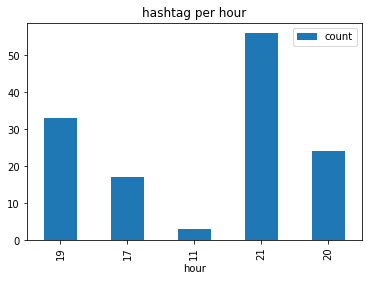

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df3 = df2.groupBy('hour').count()
df3pandas = df3.toPandas()
df3pandas.plot(kind='bar', x='hour', y='count', title='hashtag per hour')

### Add 'timestamp' & 'next' columns

'timestamp' is time of day in seconds. 'next' is time interval in second to next post with same hashtag. 

In [12]:
df3 = sqlContext.sql("""select t1.id, t1.hour, t1.minute, t1.second, (t1.hour*3600+t1.minute*60+t1.second) as timestamp, (t2.hour-t1.hour)*3600+(t2.minute-t1.minute)*60+(t2.second-t1.second) as next
                from hashtag_time as t1 join hashtag_time as t2
                where t2.id = t1.id+1""")

df3.registerTempTable('hashtag_timestamp')

df3.toPandas()

21/07/20 09:18:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/20 09:18:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,id,hour,minute,second,timestamp,next
0,1,17,50,57,64257,0
1,2,17,50,57,64257,0
2,3,17,50,57,64257,1
3,4,17,50,58,64258,0
4,5,17,50,58,64258,0
...,...,...,...,...,...,...
127,128,21,54,19,78859,2
128,129,21,54,21,78861,1
129,130,21,54,22,78862,1
130,131,21,54,23,78863,3


## We Have Outliers

Because my twitter channel isn't always fetching tweets

<AxesSubplot:title={'center':'Seconds till next hashtag'}, xlabel='id'>

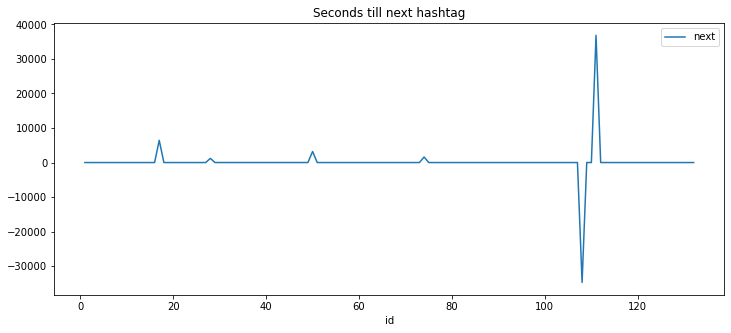

In [13]:
df3pandas = df3.toPandas()
df3pandas.plot(x='id', y='next', figsize=(12, 5), title='Seconds till next hashtag')

### Statistics with outliers

note that most 'next' values are small and around 0, but the few outlier points have changed mean & STD drastically

In [28]:
df3.describe().toPandas().transpose()

21/07/19 22:18:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:18:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,0,1,2,3,4
summary,count,mean,stddev,min,max
id,124,62.5,35.939764421413045,1,124
hour,124,19.483870967741936,1.8977259432207378,11,21
minute,124,42.016129032258064,15.732511969207717,18,58
second,124,34.645161290322584,18.561343494787696,0,59
timestamp,124,72697.54838709677,6546.391115715299,42040,78852
next,124,117.71774193548387,4608.382060155776,-34697,36804


### Outlier removal (median absolute deviation)

21/07/19 22:22:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:22:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:22:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:22:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:22:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:22:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<AxesSubplot:title={'center':'Outliers removed'}, xlabel='id'>

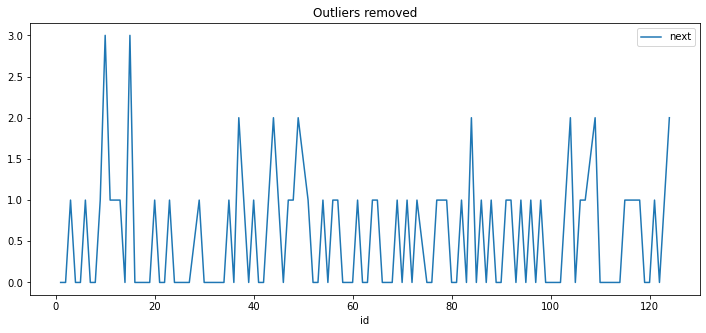

In [34]:
median = df3.approxQuantile("next", [0.5], 0.25)
df3 = df3.withColumn('diff', F.abs(F.col("next") - median[0]))

MAD = df3.approxQuantile("diff", [0.5], 0.25)[0]
df3 = df3.filter( F.col('diff') <= ( 20 * (MAD+1)))

df3pandas = df3.toPandas()
df3pandas.plot(x='id', y='next', figsize=(12, 5),  title='Outliers removed')

## Model

### Prepare features & target

In [37]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ['timestamp'], outputCol = 'features')
model_df = vectorAssembler.transform(df3)
model_df = model_df.select(['features', 'next'])
model_df.toPandas()

21/07/19 22:23:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:23:29 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,features,next
0,[64257.0],0
1,[64257.0],0
2,[64257.0],1
3,[64258.0],0
4,[64258.0],0
...,...,...
113,[78850.0],0
114,[78850.0],1
115,[78851.0],0
116,[78851.0],1


### Train-Test split

In [43]:
splits = model_df.randomSplit([0.8, 0.2])
train_df = splits[0]
test_df = splits[1]

print("Train count: " + str(train_df.count()))
print("Test count: "+ str(test_df.count()))

21/07/19 22:27:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:27:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Train count: 92


21/07/19 22:27:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:27:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Test count: 26


### Gradient Boosted Tree Regressor Model

In [56]:
from pyspark.ml.regression import GBTRegressor
from pyspark.sql.functions import round

gbt = GBTRegressor(featuresCol = 'features', labelCol='next', maxIter=10)
gbt_model  = gbt.fit(train_df)

gbt_predictions = gbt_model.transform(test_df)

gbt_predictions = gbt_predictions.select('prediction', round(F.col('prediction'), 0).alias('pred_round'), 'next', 'features')
gbt_predictions.toPandas()

21/07/19 22:40:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:40:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:40:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:40:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:40:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:40:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,prediction,pred_round,next,features
0,0.505221,1.0,0,[64257.0]
1,0.505221,1.0,0,[64258.0]
2,1.671888,2.0,0,[64259.0]
3,1.671888,2.0,0,[64259.0]
4,1.671888,2.0,1,[64264.0]
5,0.005221,0.0,0,[70692.0]
6,0.005221,0.0,1,[70692.0]
7,0.450539,0.0,2,[71905.0]
8,0.607979,1.0,2,[71910.0]
9,0.804779,1.0,0,[75108.0]


### Plot Test results

<AxesSubplot:title={'center':'Rounded Predictions'}, xlabel='features'>

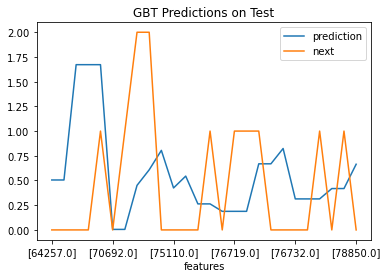

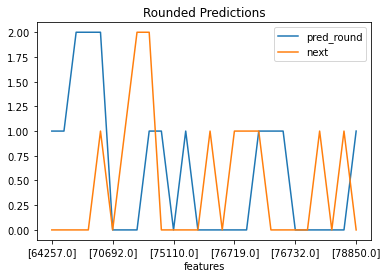

In [59]:
pandas_pred = gbt_predictions.toPandas()
pandas_pred.plot(x='features', y=['prediction', 'next'], title='GBT Predictions on Test')
pandas_pred.plot(x='features', y=['pred_round', 'next'], title='Rounded Predictions') 

### Numerical results

In [60]:
from pyspark.ml.evaluation import RegressionEvaluator

gbt_evaluator = RegressionEvaluator(
    labelCol="next", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.828092


21/07/19 22:41:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:41:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [61]:
test_df.describe().toPandas()

21/07/19 22:42:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/07/19 22:42:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,summary,next
0,count,26
1,mean,0.46153846153846156
2,stddev,0.6468860320501119
3,min,0
4,max,2


# Part 2

## Exploratory Data Analysis

### Popular Hashtags

In [9]:

import pyspark.sql.functions as f

pop_tags = sqlContext.sql("""select count(hashtag) as recurrence, hashtag 
                from hashtags 
                group by hashtag 
                order by recurrence desc
                limit 10""")

pop_tags.registerTempTable('pop_tags')

pop_tags.toPandas()

,recurrence,hashtag
0,133,خوزستان
1,43,تعویق_کنکور_ارشد
2,40,DONT_FIGHT_THE_FEELING
3,35,سلامتی_داوطلبان_ارشد
4,32,خوزستان_آب_ندارد
5,30,EXO
6,26,تعویق_ارشد_بهداشت
7,26,باقرالعلوم
8,26,اعتراضات_سراسری
9,21,قیام_تشنگان


### Hashtag IDs table (many to one relationship)

data 358 and 359 have same ID but different Hashtags

In [10]:
tag_id = sqlContext.sql("""select hashtags.hashtag, id
                from hashtags join pop_tags
                where hashtags.hashtag = pop_tags.hashtag
                order by id""")

tag_id.registerTempTable('tag_id')
tag_id.toPandas()

,hashtag,id
0,خوزستان,1416455394214518787
1,خوزستان,1416455394659012610
2,باقرالعلوم,1416455396265500679
3,خوزستان,1416455397121085442
4,اعتراضات_سراسری,1416455398488485890
...,...,...
407,خوزستان_آب_ندارد,1417241449893187586
408,خوزستان,1417241450438406149
409,سلامتی_داوطلبان_ارشد,1417241450761306120
410,تعویق_ارشد_بهداشت,1417241450761306120


## Pivot hashtags (Label embedding)
This action is like keeping a vectorized list of hashtags for each ID

In [11]:
id_targets = tag_id.orderBy('hashtag') \
                        .groupBy('id') \
                        .pivot("hashtag") \
                        .count() \
                        .na.fill(value=0)

id_targets.registerTempTable('id_targets')

print(id_targets.count())

id_targets.toPandas()

301


,id,DONT_FIGHT_THE_FEELING,EXO,اعتراضات_سراسری,باقرالعلوم,تعویق_ارشد_بهداشت,تعویق_کنکور_ارشد,خوزستان,خوزستان_آب_ندارد,سلامتی_داوطلبان_ارشد,엑소
0,1416487448343875585,0,0,1,0,0,0,0,0,0,0
1,1416455437369622531,0,0,0,0,0,0,0,1,0,0
2,1416482385781268481,0,0,0,0,0,1,0,0,0,0
3,1416507683461554176,1,0,0,0,0,0,0,0,0,0
4,1416500934025244673,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
296,1416507735739355139,1,1,0,0,0,0,0,0,0,1
297,1416507686817046538,0,0,0,1,0,0,0,0,0,0
298,1416455433800151041,0,0,0,1,0,0,0,0,0,0
299,1416487487271313411,0,0,0,1,0,0,0,0,0,0


## Get list of all IDs

In [12]:
IDs = list(id_targets.select('id').toPandas()['id'])

print(len(IDs))
IDs[:10]

301


['1416487448343875585',
 '1416455437369622531',
 '1416482385781268481',
 '1416507683461554176',
 '1416500934025244673',
 '1416487464211001348',
 '1417241383442731009',
 '1416487454006185985',
 '1416500912495943687',
 '1417241380288598018']

## Elastic Search

In [13]:
!pip install elasticsearch

     |████████████████████████████████| 356 kB 429 kB/s eta 0:00:01


In [14]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts=[{"host": "elasticsearch"}], retry_on_timeout=True)

### Get text of all tweets from Elastic

Use list of IDs here

In [15]:
result = es.search(index="twitttt", body={  "query": {
                                               "terms" : { "id" : IDs}
                                         }}, filter_path=["hits.hits._source.text_k", "hits.hits._source.id"], size=1000)

myJson = sc.parallelize(result['hits']['hits'])
id_text = sqlContext.read.json(myJson)

id_text = id_text.select(F.col("_source.id").alias("id"), F.col("_source.text_k").alias("text_k"))
id_text.registerTempTable('id_text')
id_text.toPandas()

,id,text_k
0,1.416501e+18,RT @mastoore73: امام باقر عليه السلام؛\nراه خو...
1,1.416501e+18,RT @Patriot_Reports: #فوری\n#اعتراضات_سراسری\n...
2,1.416501e+18,@As_EXOL1485 @layzhang @B_hundred_Hyun @weareo...
3,1.416501e+18,@kyungra_7 @weareoneEXO @B_hundred_Hyun @layzh...
4,1.416501e+18,RT @GreenSoo12: اگه چیزی اذیتت میکنه میتونم به...
...,...,...
342,1.416508e+18,RT @ayyaaaar: برای آباد کردن #خوزستان جنگ زده‌...
343,1.416508e+18,RT @melyasi1: استان #خوزستان از شمال وشرق توسط...
344,NaN,None
345,1.416508e+18,RT @imaniiiik: برای مردم مظلوم...🖤\n#خوزستان \...


### Join Elastic & Cassandra data

Remove possible duplicates too

In [16]:
# Keep relevant ones!
id_text_targets = sqlContext.sql("""select distinct *
                        from id_targets join id_text
                        where id_text.id = id_targets.id
                        order by id_text.id""")

id_text_targets.registerTempTable('id_text_targets')

print(id_text_targets.count())

id_text_targets.toPandas()

173


,id,DONT_FIGHT_THE_FEELING,EXO,اعتراضات_سراسری,باقرالعلوم,تعویق_ارشد_بهداشت,تعویق_کنکور_ارشد,خوزستان,خوزستان_آب_ندارد,سلامتی_داوطلبان_ارشد,엑소,id,text_k
0,1416482383772233729,0,1,0,0,0,0,0,0,0,0,1416482383772233729,RT @ExoFvn_: میخوام تو تيک تاک پستش کنم اشکالی...
1,1416482384573173761,0,0,0,0,0,0,1,0,0,0,1416482384573173761,RT @ayyaaaar: ده‌ها استاندار در سیستان بلوچستا...
2,1416482385403785221,0,0,0,0,0,0,1,0,0,0,1416482385403785221,RT @Arezou70m: خیانت یعنی از آبی که میتونی مشک...
3,1416482385781268481,0,0,0,0,0,1,0,0,0,0,1416482385781268481,@tavigh_arshad \nدو ساله رعایت کردم کرونا نگر...
4,1416482386167181314,0,0,0,0,0,0,0,1,0,0,1416482386167181314,RT @javiiiiiid: برای یه کصکش بیست و چهارساله ک...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1416507727858307076,0,0,0,0,0,0,0,1,0,0,1416507727858307076,RT @KambizGhafouri: «اولاد حسین اگر شمایید، حق...
169,1416507731469553666,0,0,0,0,0,0,1,0,0,0,1416507731469553666,RT @ayyaaaar: برای آباد کردن #خوزستان جنگ زده‌...
170,1416507732140728322,0,0,0,0,0,0,1,0,0,0,1416507732140728322,RT @melyasi1: استان #خوزستان از شمال وشرق توسط...
171,1416507736653799432,0,0,0,0,0,0,1,1,0,0,1416507736653799432,RT @imaniiiik: برای مردم مظلوم...🖤\n#خوزستان \...


## Text preprocessing

### Spark NLP (Tokenize, Normalize & Stopwords)

In [17]:
documentAssembler = DocumentAssembler() \
        .setInputCol("text_k") \
        .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

normalizer = Normalizer() \
    .setInputCols(["token"]) \
    .setOutputCol("normalized")\
    .setLowercase(True)\
    .setCleanupPatterns(["[^\u0600-\u06FF\d\s]"]) # remove punctuations (keep alphanumeric chars)

stop_words = StopWordsCleaner.pretrained("stopwords_fa", "fa") \
        .setInputCols(["normalized"]) \
        .setOutputCol("cleanTokens")

nlp_pipeline = Pipeline(stages=[documentAssembler, tokenizer, normalizer, stop_words]) #, sentence_detector, tokenizer, embeddings])
pipeline_model = nlp_pipeline.fit(spark.createDataFrame([[""]]).toDF("text_k"))
result = pipeline_model.transform(id_text_targets)

stopwords_fa download started this may take some time.
Approximate size to download 2.6 KB
[ | ]stopwords_fa download started this may take some time.
Approximate size to download 2.6 KB
[ — ]Download done! Loading the resource.
[OK!]


In [18]:
result2 = result.withColumn('words', F.col("cleanTokens.result")).drop('cleanTokens').drop('document').drop('token').drop('normalized')

result2.select('words').toPandas()[:10]

,words
0,"[میخوام, تو, تيک, تاک, پستش, کنم, اشکالی, نداره؟]"
1,"[دهها, استاندار, سیستان, بلوچستان, خوزستان, عو..."
2,"[70, خیانت, یعنی, آبی, میتونی, مشکل, شربشو, حل..."
3,"[ساله, رعایت, کردم, کرونا, نگرفتم, خدا, روشکر,..."
4,"[برای, یه, کصکش, بیست, چهارساله, قاتل, هشتگ, ز..."
5,"[چقدر, خاطره, تلخ, مانده, ذهنت, باقرالعلوم, طی..."
6,"[درود, خوزستان, حمایت, می, کنید, نگذاریم, قیام..."
7,"[کاش, تو, تکبیرهای, نماز،, مرگ, مسئولین, خوزست..."
8,"[جای, جهانآرا, خالی, ست, خوزستان]"
9,"[313, الحمدلله, آب, هور, حمیدیه, شادگان, رسید,..."


### Feature Embedding (CountVectorizer on word tokens)

No good persian embedding library so let's countVectorize!

In [19]:
from pyspark.ml.feature import CountVectorizer

countVectors = CountVectorizer(inputCol="words", outputCol="features", vocabSize=10000, minDF=5)

cv = countVectors.fit(result2)
result = cv.transform(result2)
result.select('features').toPandas()[:10]

,features
0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
2,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
4,"(0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
5,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
7,"(1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
8,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,"(1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Split Train and Test

In [20]:
train, test = result.randomSplit([0.8, 0.2], seed = 1)

print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 135


Test Dataset Count: 38


## Model

### get Labels for Multi-head binary classification

In [21]:
labels = train.columns[1:11]
labels

['DONT_FIGHT_THE_FEELING',
 'EXO',
 'اعتراضات_سراسری',
 'باقرالعلوم',
 'تعویق_ارشد_بهداشت',
 'تعویق_کنکور_ارشد',
 'خوزستان',
 'خوزستان_آب_ندارد',
 'سلامتی_داوطلبان_ارشد',
 '엑소']

### Train DecisionTree binary classifiers

for each label in list, train a binary classifier.

In [22]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from pyspark.sql.functions import monotonically_increasing_id, row_number
from pyspark.sql.window import Window

import time

# Get second element from dense vector
second_element=udf(lambda v:float(v[1]),FloatType())

test_results = test.select("id_text.id") # Only keep ID of test here

for label in train.columns[1:3]:
    
    dt = DecisionTreeClassifier(maxDepth=2, labelCol=label, probabilityCol=str(label + '_prob')) 
    model = dt.fit(train)
    result = model.transform(test)
    
    result = result.select(["id_text.id", second_element(str(label + '_prob'))]) # Keep only probability of 1
    test_results = test_results.join(result, on=["id"])
    
    time.sleep(2)

### Predictions for 2 hashtags

In [23]:
test_results = test_results.toPandas()

test_results

,id,<lambda>(DONT_FIGHT_THE_FEELING_prob),<lambda>(EXO_prob)
0,1416507680278130693,0.00,0.081481
1,1416507723357827079,0.00,0.081481
2,1416500926978957316,0.25,0.081481
3,1416507665094742020,0.00,0.081481
4,1416482393339224064,0.00,0.081481
5,1416482394354368514,0.00,0.081481
6,1416500902932922379,0.00,0.081481
7,1416500940258041860,0.00,0.081481
8,1416500934025244673,0.25,0.081481
9,1416507725626892289,0.00,0.081481


### Actual values of those hashtags

In [24]:
test = test.select(['id_text.id', 'DONT_FIGHT_THE_FEELING', 'EXO']).toPandas()

test

,id,DONT_FIGHT_THE_FEELING,EXO
0,1416507680278130693,0,0
1,1416507723357827079,0,0
2,1416500926978957316,0,0
3,1416507665094742020,0,0
4,1416482393339224064,0,0
5,1416482394354368514,0,0
6,1416500902932922379,0,0
7,1416500940258041860,0,0
8,1416500934025244673,0,0
9,1416507725626892289,0,0


### Plot results

<AxesSubplot:title={'center':'Predictions'}>

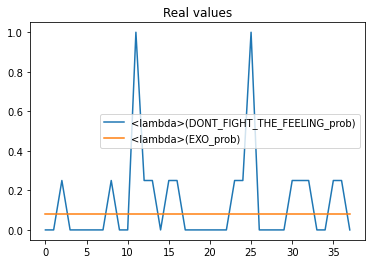

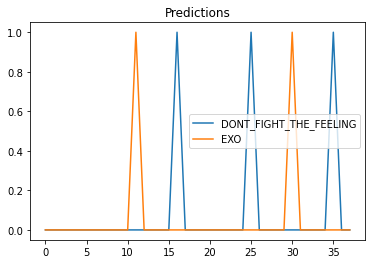

In [29]:
test_results.plot(y=['<lambda>(DONT_FIGHT_THE_FEELING_prob)', '<lambda>(EXO_prob)'], title='Real values')
test.plot(y=['DONT_FIGHT_THE_FEELING', 'EXO'], title='Predictions') 

+-------------------------------------+
|<lambda>(DONT_FIGHT_THE_FEELING_prob)|
+-------------------------------------+
|                                  0.0|
|                                  1.0|
|                                  0.0|
|                           0.16091955|
|                                  0.0|
|                                  0.0|
|                                  0.0|
|                                  0.0|
|                                  0.0|
|                           0.16091955|
|                                  0.0|
|                                  0.0|
|                           0.16091955|
|                                  1.0|
|                                  0.0|
|                           0.16091955|
|                           0.16091955|
|                           0.16091955|
|                                  0.0|
|                                  0.0|
+-------------------------------------+
only showing top 20 rows

